In [12]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import sklearn.preprocessing
from sklearn.linear_model import LogisticRegression
import sklearn.neural_network
import sklearn.model_selection
import matplotlib.pyplot as plt
import sklearn.datasets as skdata
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

# Descripción del Dataset

El dataset tiene 129 dimensiones y 2230 instancias. El número de clases es 6. Las dimensiones corresponden a 129 parametros internos de un detector de gases y las 6 clases a 6 diferentes tipos de gases 1: Ethanol; 2: Ethylene; 3: Ammonia; 4: Acetaldehyde; 5: Acetone; 6: Toluene

In [13]:
data = pd.read_csv("data_gas_3.csv")

In [14]:
#El dataset reune información de un sensor de gases e identifica 6 gases con 129 parametros internos.
#los gases están numerados en el dataset de la siguiene manera:
#1: Ethanol; 2: Ethylene; 3: Ammonia; 4: Acetaldehyde; 5: Acetone; 6: Toluene

gases = np.array(['','Ethanol', 'Ethylene', 'Ammonia', 'Acetaldehyde', 'Acetone', 'Toluene'])

data = data.drop(['U'],axis=1)
X = data.drop(['Gas'],axis=1)
Y = data['Gas']

In [15]:
scaler = StandardScaler()
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.5)

In [16]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


# Regresión logística

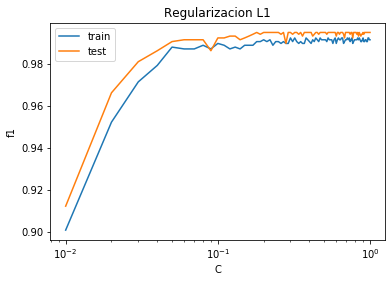

In [17]:
f1_score_l1 = []
f1_score_test_l1 = []

C_value = np.linspace(0.01,1,100)

for ii in C_value:

    clf = LogisticRegression(penalty='l1', solver='saga', tol=0.1, C=ii)
    clf.fit(x_train, y_train)
    f1_score_l1.append(sklearn.metrics.f1_score(y_train, clf.predict(x_train), average='micro'))
    f1_score_test_l1.append(sklearn.metrics.f1_score(y_test, clf.predict(x_test), average='micro'))
#    print(ii)
    
plt.figure()
plt.plot(C_value,f1_score_l1, label = "train")
plt.plot(C_value,f1_score_test_l1,label="test" )
plt.xscale('log')
plt.ylabel('f1')
plt.xlabel('C')
plt.title("Regularizacion L1")
plt.legend()

In [18]:
##Escogiendo C=0.02
clf = LogisticRegression(penalty='l1', solver='saga', tol=0.1, C=0.02)
clf.fit(x_train, y_train)
f1_score_logistic_regression = sklearn.metrics.f1_score(y_test, clf.predict(x_test), average='micro')

In [19]:
f1_score = []

f1_score_test = []

neural = []

for i in range(6):
    
    mlp = sklearn.neural_network.MLPClassifier(activation='logistic', 
                                               hidden_layer_sizes=(i+1), 
                                               max_iter=3000)
    mlp.fit(x_train, y_train)
    

    f1_score.append(sklearn.metrics.f1_score(y_train, mlp.predict(x_train), average='macro'))
    

    f1_score_test.append(sklearn.metrics.f1_score(y_test, mlp.predict(x_test), average='macro'))
    
    neural.append(i+1)
    


print('Loss', mlp.loss_)
print('F1', sklearn.metrics.f1_score(y_test, mlp.predict(x_test), average='macro'))

Loss 0.028447966201993427
F1 0.9863118462156663


# Experimento 1

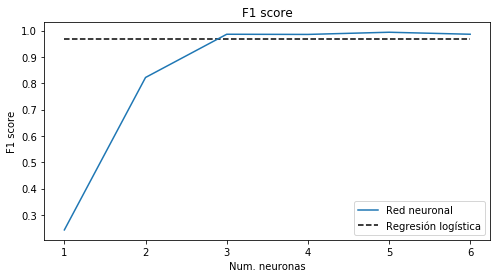

In [20]:
#loss = np.array(loss)
f1_score = np.array(f1_score)

plt.figure(figsize= (8,4))

#plt.plot(neural,f1_score, label = "train")
plt.plot(neural,f1_score_test, label = "Red neuronal")
plt.ylabel("F1 score")
plt.xlabel("Num. neuronas")
plt.hlines(f1_score_logistic_regression, 1, 6, colors='k', linestyles='dashed', label='Regresión logística')
plt.legend()
plt.title("F1 score")
plt.savefig("loss_f1.png")

# Experimento 2

Loss 0.051548423030961424
F1 0.9849468857495821


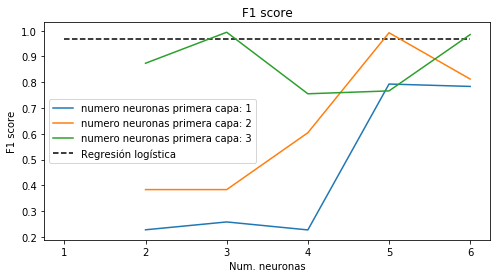

In [23]:
f1_score_2 = np.zeros(5)

f1_score_test_2 = np.zeros(5)

neural_2 = np.zeros(5)


plt.figure(figsize= (8,4))

for i in range(3):
    for j in range(5):
    
        mlp = sklearn.neural_network.MLPClassifier(activation='logistic', 
                                                   hidden_layer_sizes=(i+1,j+2), 
                                                   max_iter=3500)
        mlp.fit(x_train, y_train)


        f1_score_2[j] =(sklearn.metrics.f1_score(y_train, mlp.predict(x_train), average='macro'))


        f1_score_test_2[j] = (sklearn.metrics.f1_score(y_test, mlp.predict(x_test), average='macro'))

        neural_2[j] = (j+1)
        
    
#plt.plot(neural,f1_score, label = "train")
    num_primera_capa = i+1
    plt.plot(neural_2+1,f1_score_test_2, label = 'numero neuronas primera capa: %.0f' % num_primera_capa)
    
plt.ylabel("F1 score")
plt.xlabel("Num. neuronas")
plt.hlines(f1_score_logistic_regression, 1, 6, colors='k', linestyles='dashed', label='Regresión logística')
plt.legend()
plt.title("F1 score")
plt.savefig("loss_f1.png")


print('Loss', mlp.loss_)
print('F1', sklearn.metrics.f1_score(y_test, mlp.predict(x_test), average='macro'))

# Comentarios

*Con una sola capa y 3 neuronas se obtienen mejores resultados que con la regresión logística

** Con una red de 2 capas en la cual hay 2 neuronas en la primera capa y 5 neuronas en la segunda se obtiene un mejor resultado que la regresión logística